In [1]:
import pandas as pd 
df = pd.read_csv("online_retail_II.csv",encoding="ISO-8859-1")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [2]:
df.duplicated().sum()

np.int64(34335)

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df = df[df['Quantity']>0]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010540 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1010540 non-null  object        
 1   StockCode    1010540 non-null  object        
 2   Description  1008898 non-null  object        
 3   Quantity     1010540 non-null  int64         
 4   InvoiceDate  1010540 non-null  datetime64[ns]
 5   Price        1010540 non-null  float64       
 6   Customer ID  779495 non-null   float64       
 7   Country      1010540 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 69.4+ MB


In [9]:
df = df.dropna(subset=['Customer ID'])

In [10]:
df = df[df['Price']>0]

In [11]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [12]:
df['sales_amount'] = df['Quantity'] * df['Price']

In [13]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,sales_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [14]:
df['Customer ID'].nunique()

5878

In [15]:
df['InvoiceDate'].min(),df['InvoiceDate'].max()

(Timestamp('2009-12-01 07:45:00'), Timestamp('2011-12-09 12:50:00'))

In [16]:
df['sales_amount'].sum()

np.float64(17374804.268000003)

In [17]:
df.groupby('Customer ID')['sales_amount'].sum().sort_values(ascending=False).head()

Customer ID
18102.0    580987.04
14646.0    528602.52
14156.0    313437.62
14911.0    291420.81
17450.0    244784.25
Name: sales_amount, dtype: float64

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,sales_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779425 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       779425 non-null  object        
 1   StockCode     779425 non-null  object        
 2   Description   779425 non-null  object        
 3   Quantity      779425 non-null  int64         
 4   InvoiceDate   779425 non-null  datetime64[ns]
 5   Price         779425 non-null  float64       
 6   Customer ID   779425 non-null  float64       
 7   Country       779425 non-null  object        
 8   sales_amount  779425 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 59.5+ MB


In [21]:
last_date = df['InvoiceDate'].max()
snapshot_date = last_date - pd.DateOffset(months=6)
df_snapshot = df[df['InvoiceDate'] <= snapshot_date].copy()   # use for features
df_future   = df[(df['InvoiceDate'] > snapshot_date) & 
                 (df['InvoiceDate'] <= snapshot_date + pd.DateOffset(months=6))].copy()   # for CLV target

In [22]:
df_snapshot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538840 entries, 0 to 746031
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       538840 non-null  object        
 1   StockCode     538840 non-null  object        
 2   Description   538840 non-null  object        
 3   Quantity      538840 non-null  int64         
 4   InvoiceDate   538840 non-null  datetime64[ns]
 5   Price         538840 non-null  float64       
 6   Customer ID   538840 non-null  float64       
 7   Country       538840 non-null  object        
 8   sales_amount  538840 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 41.1+ MB


In [23]:
rfm = df_snapshot.groupby('Customer ID').agg({
  'InvoiceDate' : lambda x : (snapshot_date - x.max()).days,
  'Invoice':'count',
  'sales_amount':'sum'
}).reset_index().rename(columns={'InvoiceDate':'Recency','Invoice':'Frequency','sales_amount':'Monetary'})

In [24]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,142,34,77556.46
1,12347.0,63,124,2434.96
2,12348.0,65,48,1709.40
3,12349.0,224,102,2671.14
4,12350.0,126,17,334.40


In [25]:
import numpy as np

rfm['Monetary_log'] = np.log1p(rfm['Monetary'])
rfm['Recency_log'] = np.log1p(rfm['Recency'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])

rfm['AvgMonetary'] = rfm['Monetary'] / rfm['Frequency']
rfm['AvgMonetary_log']   = np.log1p(rfm['AvgMonetary'])

In [26]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary,Monetary_log,Recency_log,Frequency_log,AvgMonetary,AvgMonetary_log
0,12346.0,142,34,77556.46,11.258774,4.962845,3.555348,2281.072353,7.732839
1,12347.0,63,124,2434.96,7.798096,4.158883,4.828314,19.636774,3.027075
2,12348.0,65,48,1709.40,7.444483,4.189655,3.891820,35.612500,3.600390
3,12349.0,224,102,2671.14,7.890635,5.416100,4.634729,26.187647,3.302763
4,12350.0,126,17,334.40,5.815324,4.844187,2.890372,19.670588,3.028712


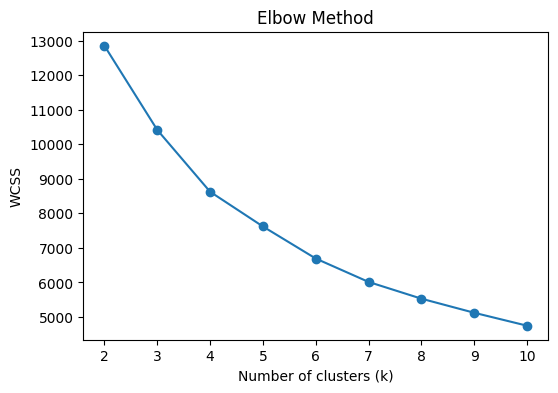

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Monetary_log','Recency_log','Frequency_log','AvgMonetary_log']])

wcss = []

for k in range(2,11):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(rfm_scaled)
  wcss.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=6,random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [29]:
rfm['Cluster'].value_counts()

Cluster
4    1278
5    1258
0     867
2     776
3     520
1     268
Name: count, dtype: int64

In [30]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().sort_values('Monetary', ascending=False)

,Recency,Frequency,Monetary
Cluster,,,
0,32.708189,378.086505,8662.210341
1,190.570896,18.574627,4853.108843
5,185.461844,77.488076,1574.004370
3,16.148077,53.000000,936.085788
2,226.494845,82.746134,490.538468
4,275.898279,13.153365,257.359023


In [31]:
cluster_labels = {
    0: 'Best Customers',
    1: 'Loyal Customers',
    5: 'Promising',
    3: 'At Risk',
    2: 'Low Value',
    4: 'Lost'
}

rfm['Segment'] = rfm['Cluster'].map(cluster_labels)

In [32]:
clv_actual = df_future.groupby('Customer ID')['sales_amount'].sum().reset_index().rename(columns={'sales_amount':'CLV_6M'})
rfm = rfm.merge(clv_actual,on='Customer ID',how='left')
rfm['CLV_6M'] = rfm['CLV_6M'].fillna(0)
rfm['CLV_6M_log'] = np.log(rfm['CLV_6M']+1)

In [33]:
rfm[rfm['Cluster']==0]

,Customer ID,Recency,Frequency,Monetary,Monetary_log,Recency_log,Frequency_log,AvgMonetary,AvgMonetary_log,Cluster,Segment,CLV_6M,CLV_6M_log
10,12356.0,62,140,6313.38,8.750585,4.143135,4.948760,45.095571,3.830717,0,Best Customers,58.35,4.083452
13,12359.0,6,260,6059.09,8.709480,1.945910,5.564520,23.304192,3.190649,0,Best Customers,2814.30,7.942824
14,12360.0,17,133,2674.41,7.891858,2.890372,4.897840,20.108346,3.049669,0,Best Customers,1578.48,7.364851
31,12380.0,2,209,7559.04,8.930632,1.098612,5.347108,36.167656,3.615439,0,Best Customers,2117.26,7.658350
42,12395.0,28,165,3272.26,8.093542,3.367296,5.111988,19.831879,3.036484,0,Best Customers,1448.91,7.279257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,18257.0,23,191,2983.72,8.001261,3.178054,5.257495,15.621571,2.810701,0,Best Customers,1616.43,7.388594
4943,18260.0,22,387,9520.13,9.161269,3.135494,5.961005,24.599819,3.242585,0,Best Customers,427.13,6.059427
4953,18272.0,41,115,2287.94,7.735844,3.737670,4.753590,19.895130,3.039516,0,Best Customers,2098.04,7.649235
4962,18283.0,17,439,1134.89,7.035172,2.890372,6.086775,2.585171,1.276806,0,Best Customers,1530.01,7.333683


In [34]:
X = rfm[['Recency_log', 'Frequency_log', 'Monetary_log', 'AvgMonetary_log', 'Cluster']]
y = rfm['CLV_6M_log']

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=500,learning_rate=0.05,max_depth=5,
                     random_state=42)
model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [37]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 2.7094
R²: 0.3447


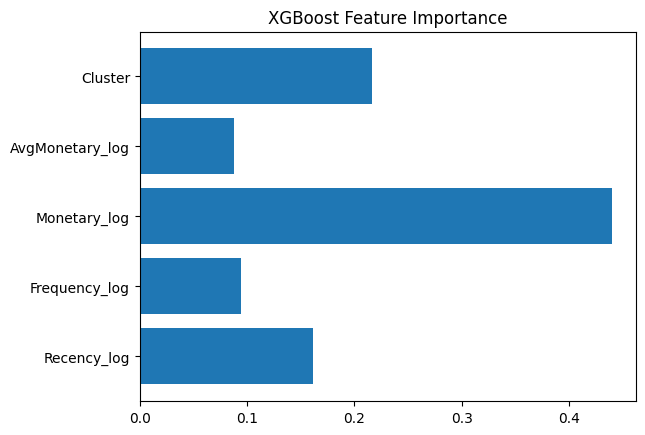

In [38]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.title("XGBoost Feature Importance")
plt.show()

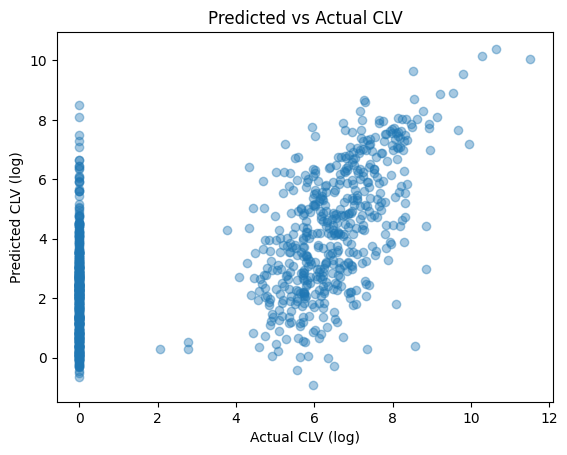

In [39]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual CLV (log)")
plt.ylabel("Predicted CLV (log)")
plt.title("Predicted vs Actual CLV")
plt.show()

In [40]:
rfm.groupby('Cluster')['CLV_6M'].mean().sort_values(ascending=False)

Cluster
0    3277.239400
1    1780.733657
3     573.644887
5     458.129030
4     232.297559
2     149.175077
Name: CLV_6M, dtype: float64